<div dir='rtl'>

## تکلیف

 شبیه‌سازی ولگشت دو بعدی و حل معادله‌ی پخش

تکلیف ولگشت

در این تمرین، از شما خواسته می‌شود تا با استفاده از شبیه‌سازی ولگشت دو بعدی، معادله‌ی پخش را حل کنید. این تمرین به شما کمک می‌کند تا درک بهتری از مفاهیم پخش و ارتباط آن با ولگشت تصادفی داشته باشید.

---

# ۱. **معادله‌ی پخش**

معادله‌ی پخش در دو بعد به صورت زیر تعریف می‌شود:

$$
\frac{\partial u(x, y, t)}{\partial t} = D \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

که در آن:
- $ u(x, y, t) $: غلظت ماده در موقعیت $ (x, y) $ و زمان $ t $.
- $ D $: ضریب پخش.

## حل تحلیلی معادله‌ی پخش
حل تحلیلی معادله‌ی پخش در دو بعد به صورت زیر است:

   $$
   u(x, y, t) = \frac{1}{4\pi D t} \exp\left( -\frac{x^2 + y^2}{4 D t} \right)
   $$


---

# ۲. **ولگشت دو بعدی و ارتباط آن با معادله‌ی پخش**

ولگشت دو بعدی مدلی است که حرکت تصادفی ذرات را توصیف می‌کند. در هر قدم، ذره به صورت تصادفی در یکی از چهار جهت (بالا، پایین، چپ، راست) حرکت می‌کند. اگر تعداد ذرات زیاد باشد، توزیع موقعیت آن‌ها با معادله‌ی پخش توصیف می‌شود.

---

# ۳. **مراحل انجام تمرین**

## الف) **شبیه‌سازی ولگشت دو بعدی**

1. تعداد $ N $ ذره را در مبدأ $ (0, 0) $ قرار دهید.
2. در هر قدم، هر ذره به صورت تصادفی در یکی از چهار جهت حرکت کند.
3. موقعیت ذرات را پس از $ M $ قدم ثبت کنید.

## ب) **محاسبه‌ی توزیع ذرات**
1. فضای دوبعدی را به یک شبکه‌ی مربعی تقسیم کنید.
2. تعداد ذرات در هر سلول شبکه را شمارش کنید.
3. توزیع ذرات را به صورت یک تابع $ u(x, y, t) $ در نظر بگیرید.

## ج) **مقایسه با حل تحلیلی معادله‌ی پخش**
۱. توزیع ذرات حاصل از شبیه‌سازی را با حل تحلیلی مقایسه کنید.

---

# ۴. **رسم نتایج**

## الف) **رسم توزیع ذرات**
- توزیع ذرات را پس از $ M $ قدم به صورت یک نمودار دو بعدی رسم کنید.
- از رنگ‌های مختلف برای نشان‌دادن غلظت ذرات در هر سلول استفاده کنید.

## ب) **رسم حل تحلیلی**
- حل تحلیلی معادله‌ی پخش را برای زمان‌های مختلف رسم کنید.
- نتایج شبیه‌سازی و حل تحلیلی را با هم مقایسه کنید.

---

# ۵. **حالت غیر متقارن**
در این بخش می‌خواهیم احتمال انتخاب یک جهت (مثلا جهت بالا) را افزاییش دهیم. می‌توانید اگر قرار بود حرکت در راستای عمودی باشد، در ۴۰ درصد موارد حرکت پایین و در ۶۰ درصد موارد حرکت به سمت بالا را انتخاب کنید.

تمرین بالا را تکرار کنید و توزیع ذرات بر حسب زمان را به دست بیاورید.

برای اینکه معادله ی پخش شبیه به نتایج به دست امده باشد، باید چه تغییری در آن ایجاد کنید؟


+++

باید با حل این تمرین درک خوبی نسبت به معادله‌ی پخش و ارتباط آن با ولگرد دو بعدی پیدا کرده باشید.


---



</div>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from IPython.display import Video
from scipy.optimize import curve_fit, least_squares

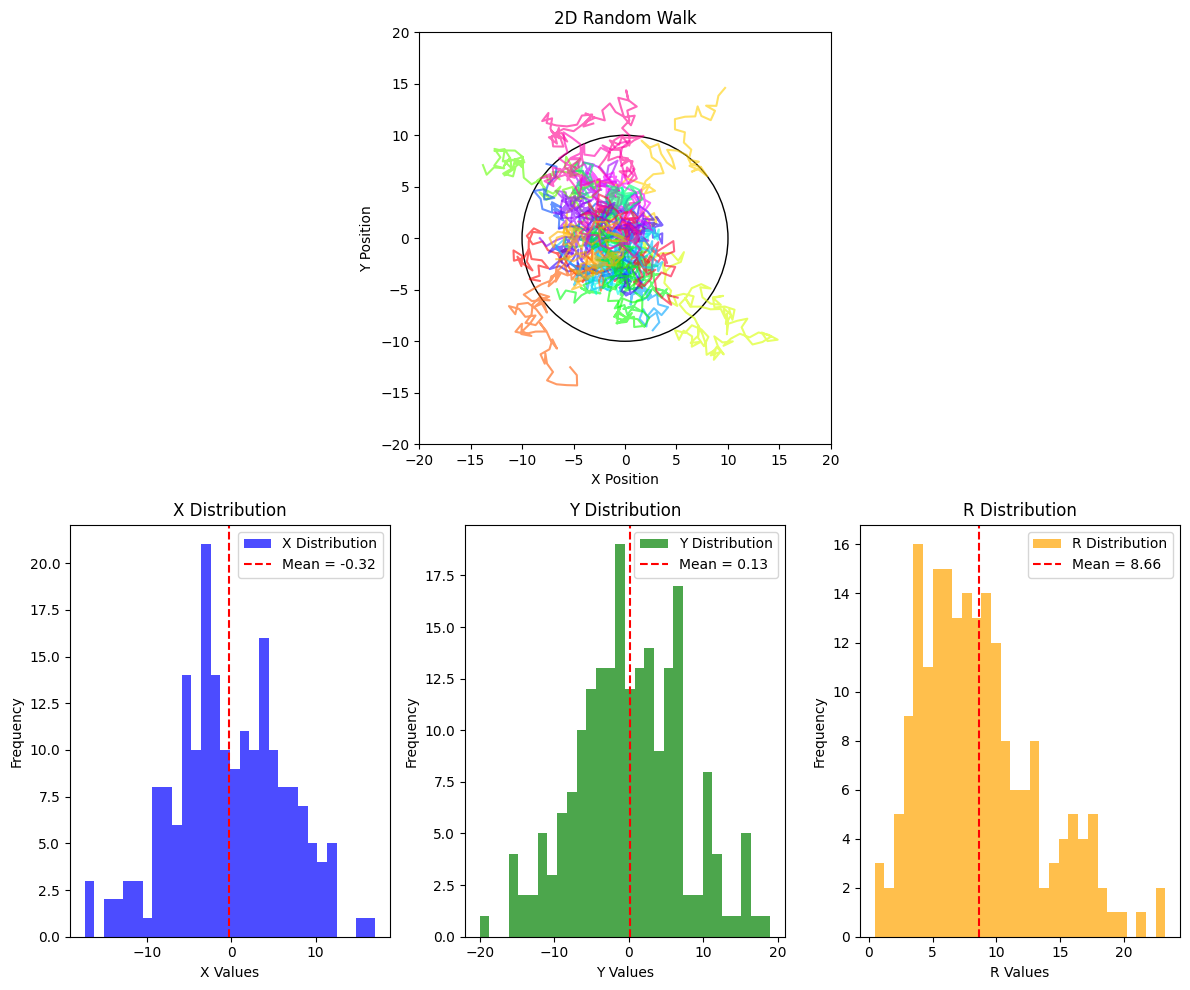

In [5]:
N = 100
r = 1

def produce1randomWalker(N, r):
    random_angles = np.random.uniform(0, 2 * np.pi, N)
    
    x_values = r * np.cos(random_angles)
    y_values = r * np.sin(random_angles)

    steps_x = np.cumsum(x_values)
    steps_y = np.cumsum(y_values)

    steps_x[0] = 0
    steps_y[0] = 0
    return steps_x, steps_y

# Create subplots: 2 rows, 1 column
fig = plt.figure(figsize=(12, 10))  # Larger figure size for better visualization

# Top row: 2D random walk plot
ax1 = plt.subplot2grid((2, 1), (0, 0))  # Top row
avg_r = (np.average(r) + np.std(r)) * np.sqrt(N)
ax1.set_xlim(-2 * avg_r, 2 * avg_r)
ax1.set_ylim(-2 * avg_r, 2 * avg_r)

all_x = []
all_y = []
all_r = []
for i in range(200):
    x, y = produce1randomWalker(N, r)
    if i%10 == 0 :
        ax1.plot(x, y, color=plt.cm.hsv(i * 20 % 255), alpha=0.6)
    all_x.append(x[-1])
    all_y.append(y[-1])
    all_r.append( np.sqrt(x[-1]**2 + y[-1]**2) )

ax1.set_aspect(1)
ax1.add_artist(plt.Circle((0, 0), avg_r, color='black', fill=False, alpha=1))
ax1.set_title("2D Random Walk")
ax1.set_xlabel("X Position")
ax1.set_ylabel("Y Position")

# Bottom row: 1D distributions
ax2 = plt.subplot2grid((2, 3), (1, 0))  # Bottom left: X distribution
ax3 = plt.subplot2grid((2, 3), (1, 1))  # Bottom right: Y distribution
ax4 = plt.subplot2grid((2, 3), (1, 2))  # Bottom right: Y distribution

# Plot the x distribution
ax2.hist(all_x, bins=30, color='blue', alpha=0.7, label="X Distribution")
ax2.axvline(np.mean(all_x), color='red', linestyle='--', label=f"Mean = {np.mean(all_x):.2f}")
ax2.set_title("X Distribution")
ax2.set_xlabel("X Values")
ax2.set_ylabel("Frequency")
ax2.legend()

# Plot the y distribution
ax3.hist(all_y, bins=30, color='green', alpha=0.7, label="Y Distribution")
ax3.axvline(np.mean(all_y), color='red', linestyle='--', label=f"Mean = {np.mean(all_y):.2f}")
ax3.set_title("Y Distribution")
ax3.set_xlabel("Y Values")
ax3.set_ylabel("Frequency")
ax3.legend()

# Plot the r distribution
ax4.hist(all_r, bins=30, color='orange', alpha=0.7, label="R Distribution")
ax4.axvline(np.mean(all_r), color='red', linestyle='--', label=f"Mean = {np.mean(all_r):.2f}")
ax4.set_title("R Distribution")
ax4.set_xlabel("R Values")
ax4.set_ylabel("Frequency")
ax4.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<div dir='rtl'>

# ۳
## الف و ب)

کلاس زیر، کارهای خواسته شده در بخش‌های **الف** و **ب** بخش ۳ را انجام می‌دهد:

In [6]:
class Walker:
    def __init__(self, num_walkers: int, *, starting_point: (int, int) = (0, 0)):
        self.num_walkers = num_walkers
        self.starting_point = starting_point

    def walk(self, num_steps: int, *, probabilities: [float] = [0.25, 0.25, 0.25, 0.25]):
        self.num_steps = num_steps

        self.steps = np.zeros((num_walkers, 2, num_steps)) + np.array(self.starting_point).reshape(1, 2, 1)
        rand = np.random.choice(["up", "down", "left", "right"], size=(num_walkers, num_steps - 1), p=probabilities)

        self.steps[:,0,1:] = np.cumsum(1 * (rand == "left") - 1 * (rand == "right"), axis=1)
        self.steps[:,1,1:] = np.cumsum(1 * (rand == "up") - 1 * (rand == "down"), axis=1)

        end_positions = self.steps[:,:,-1]

        self.min_range = min(np.min(self.steps), -np.max(self.steps))
        self.max_range = max(np.max(self.steps), -np.min(self.steps))

        return end_positions

    def u(self, x: float, y: float, t: float, *, num_bins: int = 20, return_all: bool = False):
        if t < 0:
            return 0
        elif t >= self.num_steps:
            step = self.num_steps - 1
        else:
            step = int(t)


        xy_range = np.linspace(self.min_range, self.max_range, num_bins)
        grid, _, _ = np.histogram2d(self.steps[:,0,step], self.steps[:,1,step], bins=(xy_range, xy_range))

        if return_all:
            return grid, xy_range

        if t == 0:
            if x != 0 or y != 0:
                return 0
            else:
                return np.inf
        
        if x > max(x_range) or x < min(x_range):
            return 0
        elif y > max(y_range) or y < min(y_range):
            return 0
        else:
            x = np.searchsorted(x_range, x)
            y = np.searchsorted(y_range, y)

        return grid[x, y]/num_walkers

<div dir='rtl'>

## ج)

حل تحلیلی:

In [7]:
def u(x: float, y: float, t: float, *, D: float = 1, A: float = 1, max_val: float = 10000):
    if t == 0:
        if x == 0 and y == 0:
            return max_val
        else:
            return 0

    return A / 4 / np.pi / D / t * np.exp(-(x**2 + y**2) / 4 / D / t)

u = np.vectorize(u)

<div dir='rtl'>

برای مقایسه‌ی حل تحلیلی با نتایج شبیه‌سازی، باید ابتدا مقدار بهینه‌ی $D$ و یک متغیر مقیاس ($A$)  را در فرمول حل تحلیلی حساب کنیم:

In [8]:
num_walkers = 10000
num_steps = 1000

walker = Walker(num_walkers)

end_positions = walker.walk(num_steps)

In [9]:
def residuals(params, model_input, data):
    D, A = params
    x, y, t = model_input
    return (u(x, y, t, D=D, A=A) - data).ravel()

In [10]:
grid, xy_range = walker.u(0, 0, np.inf, return_all=True)

y_data, x_data = np.meshgrid((xy_range[:-1] + xy_range[1:])/2, (xy_range[:-1] + xy_range[1:])/2)

model_input = [x_data, y_data, np.ones(x_data.shape) * num_steps]
D_guess = 0.3
A_guess = 1e6

result = least_squares(residuals, x0=[D_guess, A_guess], args=(model_input, grid))
D, A = result.x

print("The best-fit value for D = {:.2e}".format(D))
print("The best-fit value for A = {:.2e}".format(A))

The best-fit value for D = 2.73e-01
The best-fit value for A = 9.75e+05


<div dir='rtl'>

# ۴
## الف و ب)

انیمیشن‌های زیر، به ترتیب ولگشت دو بعدی ۱۰ هزار ذره به مدت ۱۰۰۰ قدم، و حل تحلیلی با بهترین برازش معادله‌ی پخش را نشان می‌دهند:

In [ ]:
fig = plt.figure(figsize=(8,8))

im = plt.imshow(walker.u(0, 0, 0, return_all=True)[0].T[::-1], extent=[walker.min_range, walker.max_range, walker.min_range, walker.max_range], norm=LogNorm(vmin=1, vmax=1000))
plt.colorbar()

def animate_func(i):
    im.set_array(walker.u(0, 0, i, return_all=True)[0].T[::-1])
    return [im]

anim = animation.FuncAnimation(fig, animate_func, frames=1000, interval=1)

anim.save('symmetric_random_walk.mp4', fps=120, extra_args=['-vcodec', 'libx264'])

In [21]:
Video('symmetric_random_walk.mp4')

In [ ]:
fig = plt.figure(figsize=(8,8))

im = plt.imshow(u(x_data, y_data, 0, D=D, A=A).astype(int).T[::-1], extent=[walker.min_range, walker.max_range, walker.min_range, walker.max_range], norm=LogNorm(vmin=1, vmax=1000))
plt.colorbar()

def animate_func(i):
    im.set_array(u(x_data, y_data, i, D=D, A=A).astype(int).T[::-1])
    return [im]

anim = animation.FuncAnimation(fig, animate_func, frames=1000, interval = 1)

anim.save('symmetric_dispersion_function.mp4', fps=120, extra_args=['-vcodec', 'libx264'])

In [22]:
Video('symmetric_dispersion_function.mp4')

<div dir='rtl'>

# ۵
 از آنجایی که ذرات در طول زمان به طور متوسط به بالا حرکت می‌کنند، معادله‌ی پخش باید یک پارامتر وابسته به زمان داشته باشه از $y$ کم شود.

In [13]:
num_walkers = 10000
num_steps = 1000

walker = Walker(num_walkers)

end_positions = walker.walk(num_steps, probabilities=[0.3, 0.2, 0.25, 0.25])

In [ ]:
fig = plt.figure(figsize=(8,8))

im = plt.imshow(walker.u(0, 0, 0, return_all=True)[0].T[::-1], extent=[walker.min_range, walker.max_range, walker.min_range, walker.max_range], norm=LogNorm(vmin=1, vmax=1000))
plt.colorbar()

def animate_func(i):
    im.set_array(walker.u(0, 0, i, return_all=True)[0].T[::-1])
    return [im]

anim = animation.FuncAnimation(fig, animate_func, frames=1000, interval=1)

anim.save('nonsymmetric_random_walk.mp4', fps=120, extra_args=['-vcodec', 'libx264'])

In [19]:
Video('nonsymmetric_random_walk.mp4')

In [15]:
def u(x: float, y: float, t: float, *, y0: float = 0, D: float = 1, A: float = 1, max_val: float = 10000):
    if t == 0:
        if x == 0 and y == 0:
            return max_val
        else:
            return 0

    return A / 4 / np.pi / D / t * np.exp(-(x**2 + (y - y0 * t)**2) / 4 / D / t)

u = np.vectorize(u)

In [16]:
def residuals(params, model_input, data):
    y0, D, A = params
    x, y, t = model_input
    return (u(x, y, t, y0=y0, D=D, A=A) - data).ravel()

In [17]:
grid, xy_range = walker.u(0, 0, np.inf, return_all=True)

y_data, x_data = np.meshgrid((xy_range[:-1] + xy_range[1:])/2, (xy_range[:-1] + xy_range[1:])/2)

model_input = [x_data, y_data, np.ones(x_data.shape) * num_steps]
y0_guess = 0.1
D_guess = 0.3
A_guess = 1e6

result = least_squares(residuals, x0=[y0_guess, D_guess, A_guess], args=(model_input, grid))
y0, D, A = result.x

print("The convergence was {}".format(result.success))
print("The best-fit value for y0 = {:.2e}".format(y0))
print("The best-fit value for D = {:.2e}".format(D))
print("The best-fit value for A = {:.2e}".format(A))

The convergence was True
The best-fit value for y0 = 9.99e-02
The best-fit value for D = 2.62e-01
The best-fit value for A = 3.56e+06


In [ ]:
fig = plt.figure(figsize=(8,8))

im = plt.imshow(u(x_data, y_data, 0, y0=y0, D=D, A=A).astype(int).T[::-1], extent=[walker.min_range, walker.max_range, walker.min_range, walker.max_range], norm=LogNorm(vmin=1, vmax=1000))
plt.colorbar()

def animate_func(i):
    im.set_array(u(x_data, y_data, i, y0=y0, D=D, A=A).astype(int).T[::-1])
    return [im]

anim = animation.FuncAnimation(fig, animate_func, frames=1000, interval = 1);

anim.save('nonsymmetric_dispersion_function.mp4', fps=120, extra_args=['-vcodec', 'libx264']);

In [23]:
Video('nonsymmetric_dispersion_function.mp4')